In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_drink_nutrition = "./Kasy-Resources/starbucks-menu-nutrition-drinks.csv"
file_worldwide = "./Kasy-Resources/worldwide-sbux-locations.csv"
county_info = "./Priya's Resources/Farmers Markets/wiki_county_info.csv" 
file_income = "./Kasy-Resources/kaggle_income.csv"

sbux_df = pd.read_csv(file_drink_nutrition)
sbux_df = sbux_df.rename(columns={"Unnamed: 0":"Starbucks Drink Name"})
worldwide_sbux = pd.read_csv(file_worldwide)
county_df = pd.read_csv(county_info)
income_df = pd.read_csv(file_income, encoding="ISO-8859-1")

In [6]:
# Household incomes 

ca_income = income_df.loc[income_df["State_Name"] == "California"]
ca_income = ca_income[["State_Name", "City", "Mean", "Median", "Stdev"]]
ca_income = ca_income.rename({"State_Name": "State"}).reset_index()
ca_income = ca_income.drop(columns="index")
median = ca_income.groupby("City").median()["Median"]
mean = ca_income.groupby("City").mean()["Mean"]

ca_income_cleaned = {"Mean": mean, 
                    "Median": median}
ca_income_cleaned_df = pd.DataFrame(ca_income_cleaned)


In [7]:
us_sbux = worldwide_sbux[worldwide_sbux["Country"] == "US"]
ca_sbux = us_sbux[us_sbux["State/Province"] == "CA"]
ca_sbux["City"] = ca_sbux["City"].str.capitalize()
ca_sbux = ca_sbux.replace("Ahaheim", "Anaheim")
ca_sbux = ca_sbux.replace("Ahaheim hills", "Anaheim")
ca_sbux = ca_sbux.replace("Gold river", "Goleta")
ca_sbux = ca_sbux.replace("San francisco intl a", "San francisco")
ca_sbux = ca_sbux.replace("Sandiego", "San diego")
ca_sbux = ca_sbux.replace("South corona", "Corona")
ca_sbux = ca_sbux.replace("South san francisco", "San francisco")
ca_sbux = ca_sbux.replace("South san francisco", "San francisco")
ca_sbux = ca_sbux.replace("South san francisco", "San francisco")
ca_sbux = ca_sbux.replace("Stanford", "Palo alto")
ca_sbux = ca_sbux.replace("Travis afb", "Fairfield")
ca_sbux = ca_sbux.replace("West hollywood", "Los angeles")
ca_sbux = ca_sbux.replace("Westlake", "Westlake village")
ca_sbux = ca_sbux.replace("Westwood", "Los angeles")
ca_sbux = ca_sbux[["City", "State/Province", "Country"]]
ca_sbux_cleaned = ca_sbux.groupby(["City"]).count()


<ipython-input-7-92830905ae1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_sbux["City"] = ca_sbux["City"].str.capitalize()


In [8]:
merged_df = pd.merge(ca_sbux_cleaned, ca_income_cleaned_df, on="City", how="inner")
merged_df

,State/Province,Country,Mean,Median
City,,,,
Adelanto,1,1,36944.000000,17430.0
Agoura,1,1,140704.000000,300000.0
Alameda,7,7,89726.375000,68699.5
Albany,1,1,98633.000000,300000.0
Alhambra,6,6,75486.222222,58614.0
...,...,...,...,...
Winchester,1,1,117607.000000,300000.0
Windsor,4,4,90040.000000,65017.0
Woodland,4,4,69934.400000,44024.0


In [13]:
merged_df = merged_df[["Country", "Mean", "Median"]]

In [11]:
merged_df_cleaned = merged_df.rename(columns={"Country":"Starbuck Stores", 
                                     "Mean":"Mean Income", 
                                     "Median":"Median Income"})

Text(0, 0.5, 'Median Income')

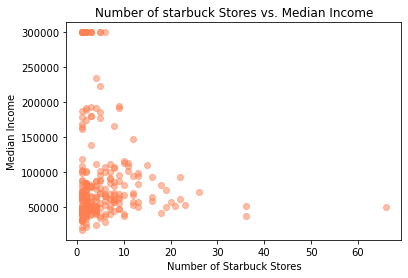

In [22]:
x_axis = merged_df_cleaned["Starbuck Stores"]
y_axis = merged_df_cleaned["Median Income"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="coral", alpha=0.5)
plt.title("Number of starbuck Stores vs. Median Income")
plt.xlabel("Number of Starbuck Stores")
plt.ylabel("Median Income")